# Feature Extraction 

The `featureExtractor` class in `ml5_ipynb` can perform transfer learning, which uses `'MobileNet'` as the pre-trained model by default. It will extract the learned features from pre-trained model and continue to train on new data of downstream tasks. In a simple setting of `featureExtractor`, you only need to specify task when intializing featureExtractor. 

This example is to show how to use `'MobileNet'` to train on new images of three classes: dobby, train, zucchini.

In [1]:
from ml5_ipynb import ml5_image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from PIL import Image
import io
import time
%matplotlib inline

In [2]:
dobby = os.listdir('pic/dobby')[1:]
zucchini = os.listdir('pic/zucchini')[1:]
train = os.listdir('pic/train')[1:]

In [3]:
dobby_list = ['pic/dobby/'+i for i in dobby]
zucchini_list = ['pic/zucchini/'+i for i in zucchini]
train_list = ['pic/train/'+i for i in train]

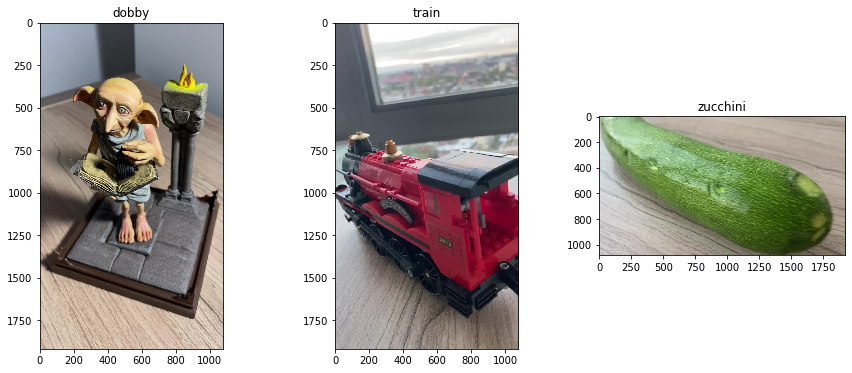

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
ax[0].imshow(plt.imread(dobby_list[0]))
ax[0].set_title('dobby')
ax[1].imshow(plt.imread(train_list[0]))
ax[1].set_title('train')
ax[2].imshow(plt.imread(zucchini_list[0]))
ax[2].set_title('zucchini')
print()

The default options for the MobileNet model is as followed:
```
{
    'version': 1,
    'alpha': 1.0,
    'topk': 3,
    'learningRate': 0.0001,
    'hiddenUnits': 100,
    'epochs': 20,
    'numLabels': 2,
    'batchSize': 0.4,
}
```
Since we have three classes, we need to pass 3 to `numLabels` when initializing. 

In [5]:
nn = ml5_image.featureExtractor('classification', model='MobileNet', numLabels=3)

................Model is ready


In [6]:
# add train images
for i in train_list:
    nn.add_image(i,'train')

.done
..done
..done
..done
..done
..done
..done
..done
..done
..done
..done


In [7]:
# add dobby images
for i in dobby_list:
    nn.add_image(i,'dobby')

.done
..done
..done
..done
..done
..done
..done
..done
..done
..done
..done
..done


In [8]:
# add zucchini images
for i in zucchini_list:
    nn.add_image(i,'zucchini')

.done
..done
..done
..done
..done
..done
..done
..done
..done
..done
..done


In [9]:
# train (need to wait for a while even though 'done' is printed)
nn.train()

.done


### Test on the class of dobby

done


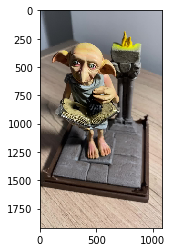

In [10]:
img = dobby_list[1]
nn.classify(img)
plt.imshow(plt.imread(img))

In [11]:
nn.classify_callback_list[-1]

[{'label': 'dobby', 'confidence': 0.9999994039535522},
 {'label': 'zucchini', 'confidence': 4.3592626752797514e-07},
 {'label': 'train', 'confidence': 1.6423621218564222e-07}]

### Test on the class of train

done


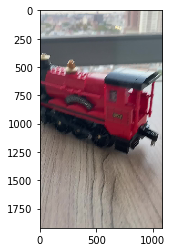

In [12]:
img = train_list[1]
nn.classify(img)
plt.imshow(plt.imread(img))

In [13]:
nn.classify_callback_list[-1]

[{'label': 'train', 'confidence': 0.999964714050293},
 {'label': 'zucchini', 'confidence': 2.4760307496762834e-05},
 {'label': 'dobby', 'confidence': 1.0522794582357164e-05}]

### Test on the class of zucchini

done


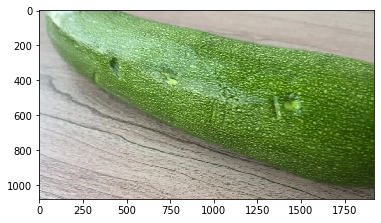

In [14]:
img = zucchini_list[1]
nn.classify(img)
plt.imshow(plt.imread(img))

In [15]:
nn.classify_callback_list[-1]

[{'label': 'zucchini', 'confidence': 0.9999991655349731},
 {'label': 'dobby', 'confidence': 8.226412546719075e-07},
 {'label': 'train', 'confidence': 1.0423463869813077e-08}]